In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
#data = pd.read_csv("/Users/nilesh/Downloads/Data Science/Test_Dataset/train.csv")
data = pd.read_csv('https://raw.githubusercontent.com/NeilPandey/Test_Dataset/master/train.csv')
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
data.shape

(2000, 21)

In [4]:
data.price_range.unique()

array([1, 2, 3, 0])

In [5]:
#Univariate Selection
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Speculation','Score_with_y']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score_with_y'))  #print 10 best features

      Speculation   Score_with_y
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
19           wifi       0.422091
17        three_g       0.327643


In [6]:
from sklearn.ensemble import ExtraTreesClassifier

In [7]:
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[0.06148226 0.02059201 0.03246656 0.01964623 0.03182451 0.01698801
 0.03517749 0.03266279 0.03493057 0.03319575 0.03374558 0.04628888
 0.04864287 0.40072283 0.03214239 0.0333909  0.03313285 0.01434651
 0.0188532  0.01976781]


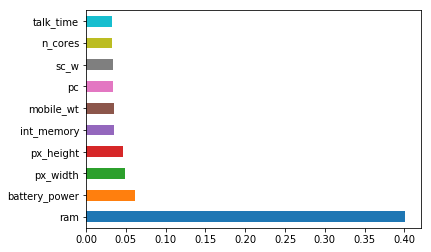

In [8]:
#Feature Importance
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

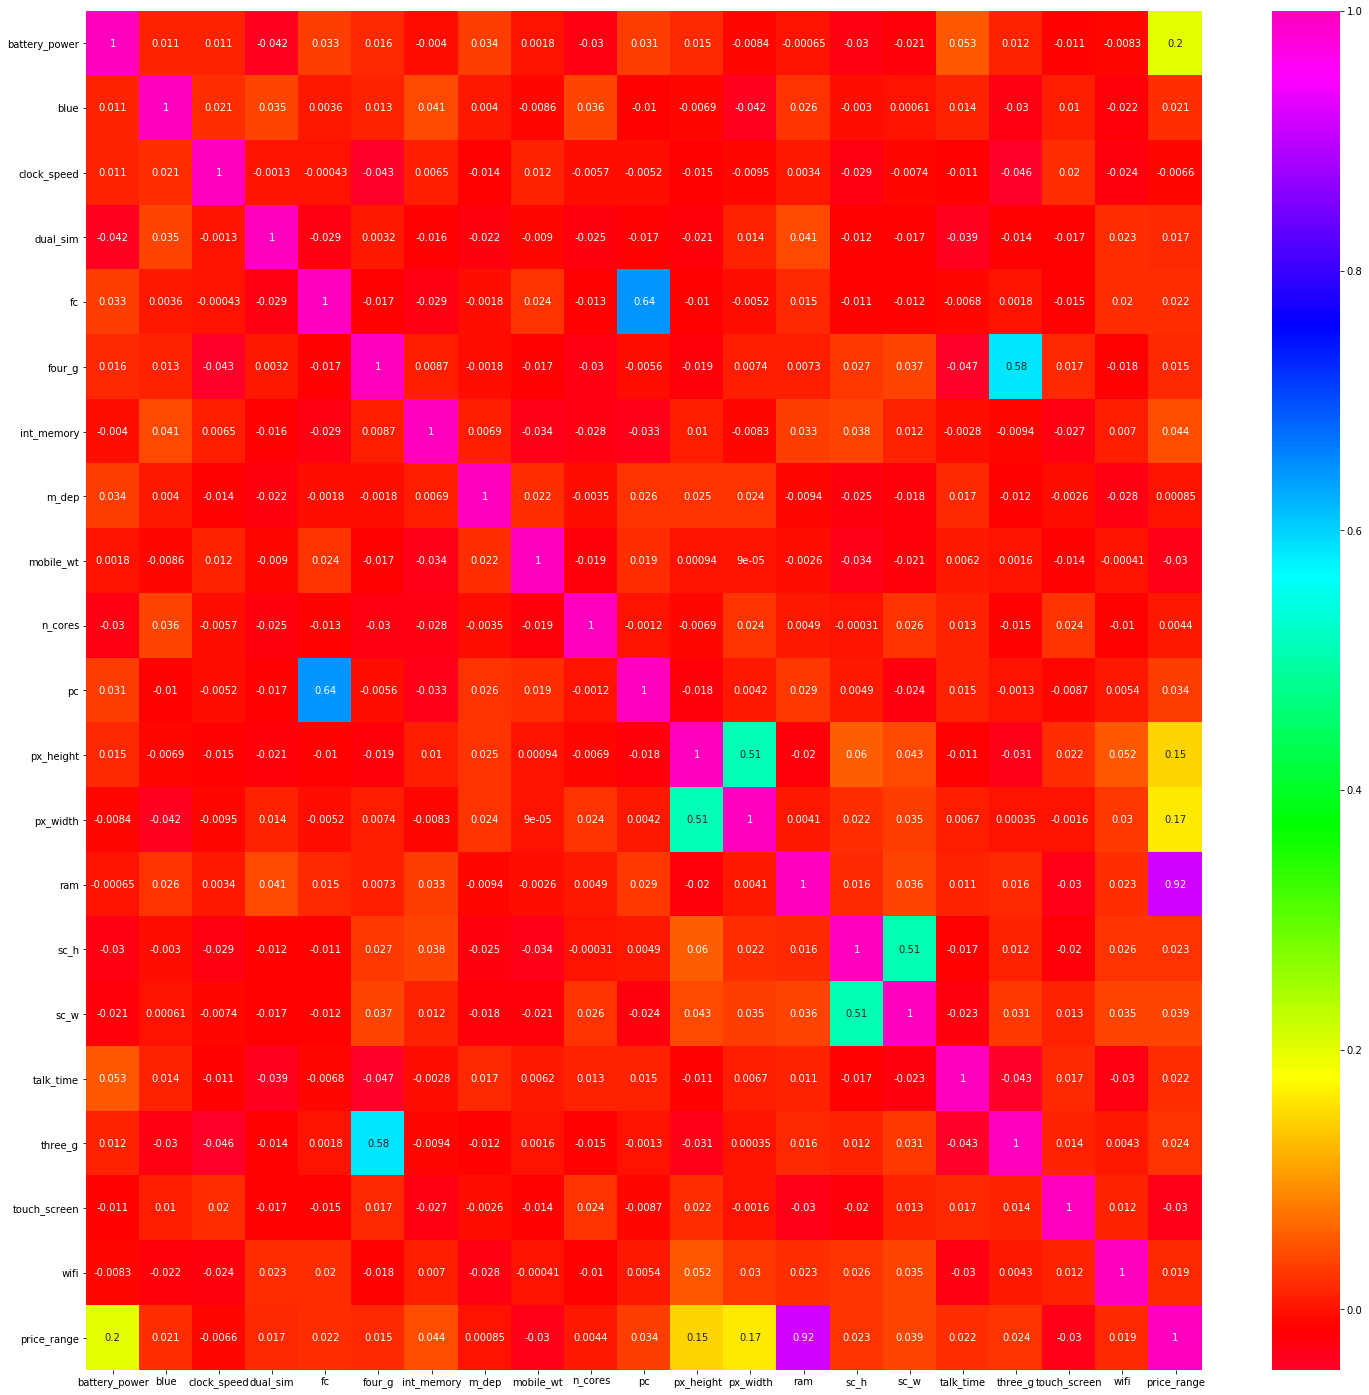

In [9]:
#Correlation Matrix with Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,
              cmap="gist_rainbow")


In [10]:
df = [1,2,3,4,5,6,7,9,10,13,16,17,20,23]
#3,4,4,4,7,10,11,12,14,16,17,18
#quartile
#df1 = [1, 3, 3, 4, 5, 6, 6, 7, 8, 8]

In [11]:
np.quantile(df,0.25) # Q = (3+10.5)/2 , Q2 = 10.5, Q3 = (18+7.5)/2=

4.25